In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [13]:
df = pd.read_csv('drugs_side_effects_drugs_com.csv')

In [15]:
df.head()

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


In [17]:
df.isnull().sum()

drug_name                           0
medical_condition                   0
side_effects                      124
generic_name                       43
drug_classes                       82
brand_names                      1213
activity                            0
rx_otc                              1
pregnancy_category                229
csa                                 0
alcohol                          1554
related_drugs                    1469
medical_condition_description       0
rating                           1345
no_of_reviews                    1345
drug_link                           0
medical_condition_url               0
dtype: int64

In [21]:
df_cleaned = df.dropna()

In [23]:
df_filled = df.fillna('Unknown')

In [25]:
df.describe()

,rating,no_of_reviews
count,1586.000000,1586.000000
mean,6.812926,75.064943
std,2.313044,184.900847
min,0.000000,1.000000
25%,5.600000,2.000000
50%,7.000000,12.000000
75%,8.500000,58.000000
max,10.000000,2934.000000


<Axes: xlabel='rating', ylabel='Count'>

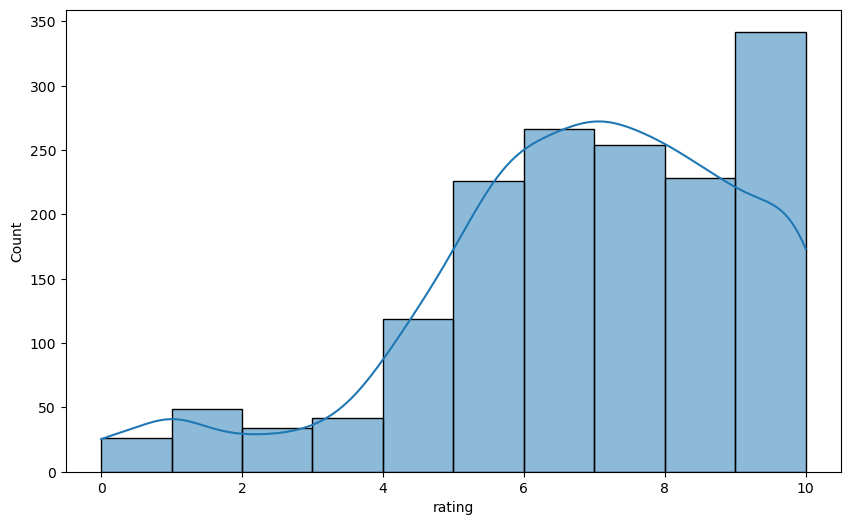

In [27]:
plt.figure(figsize=(10, 6)) 
sns.histplot(df['rating'], bins=10, kde=True) 

Text(0.5, 1.0, 'Distribution of Drug Ratings')

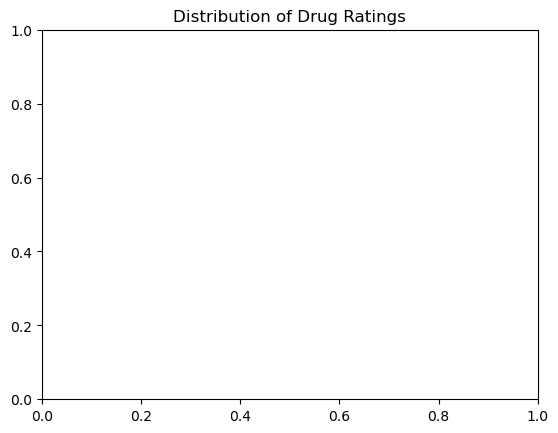

In [29]:
plt.title('Distribution of Drug Ratings') 

Text(0.5, 0, 'Rating')

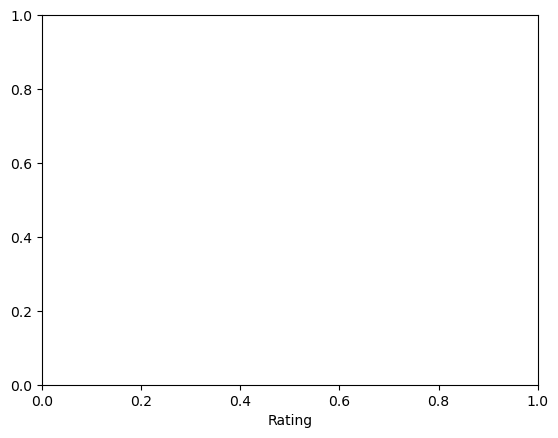

In [33]:
plt.xlabel('Rating') 

Text(0, 0.5, 'Frequency')

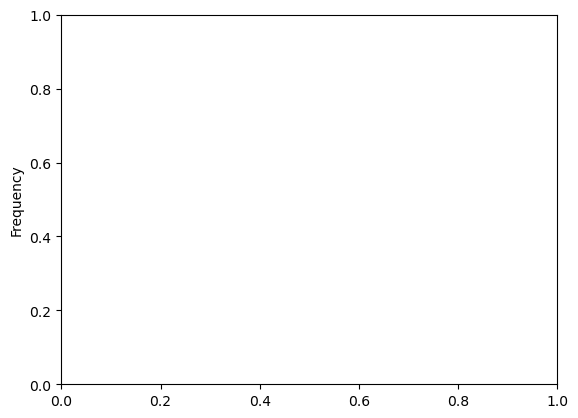

In [35]:
plt.ylabel('Frequency') 

In [37]:
plt.show()

In [63]:
top_drugs_per_condition = df.groupby('medical_condition')['drug_name'].value_counts().groupby(level=0).head(1)

In [67]:
print(top_drugs_per_condition)

medical_condition     drug_name                       
ADHD                  Adderall                            1
AIDS/HIV              AccessPak for HIV PEP Basic         1
Acne                  minocycline                         2
Allergies             Acthar                              1
Alzheimer's           Adlarity                            1
Angina                Angiomax                            1
Anxiety               Alprazolam Intensol                 1
Asthma                Alvesco                             1
Bipolar Disorder      Abilify                             1
Bronchitis            Altarussin                          1
COPD                  Anoro Ellipta                       1
Cancer                Cosmegen                            1
Cholesterol           Altocor                             1
Colds & Flu           A-Phedrin                           1
Constipation          Bisa-Lax                            1
Covid 19              Actemra                

In [69]:
side_effects = df['side_effects'].value_counts().head(10)

In [71]:
print(side_effects)

side_effects
hives ; difficult breathing; swelling of your face, lips, tongue, or throat. This medicine may cause serious side effects. Stop using this medicine and call your doctor at once if you have: redness or swelling of the treated area; increased pain; or severe burning or skin irritation such as a rash, itching, pain, or blistering. Less serious side effects may be more likely, and you may have none at all.                                                                                                                                                                                           10
hives ; difficult breathing; swelling of your face, lips, tongue, or throat. This medicine may cause serious side effects. Stop using this medicine and call your doctor at once if you have: bone pain, muscle weakness; confusion, changes in your mental state, seizure (convulsions); or pale skin, feeling light-headed or short of breath, rapid heart rate. Less serious side effects may be more

<Axes: xlabel='drug_classes', ylabel='rating'>

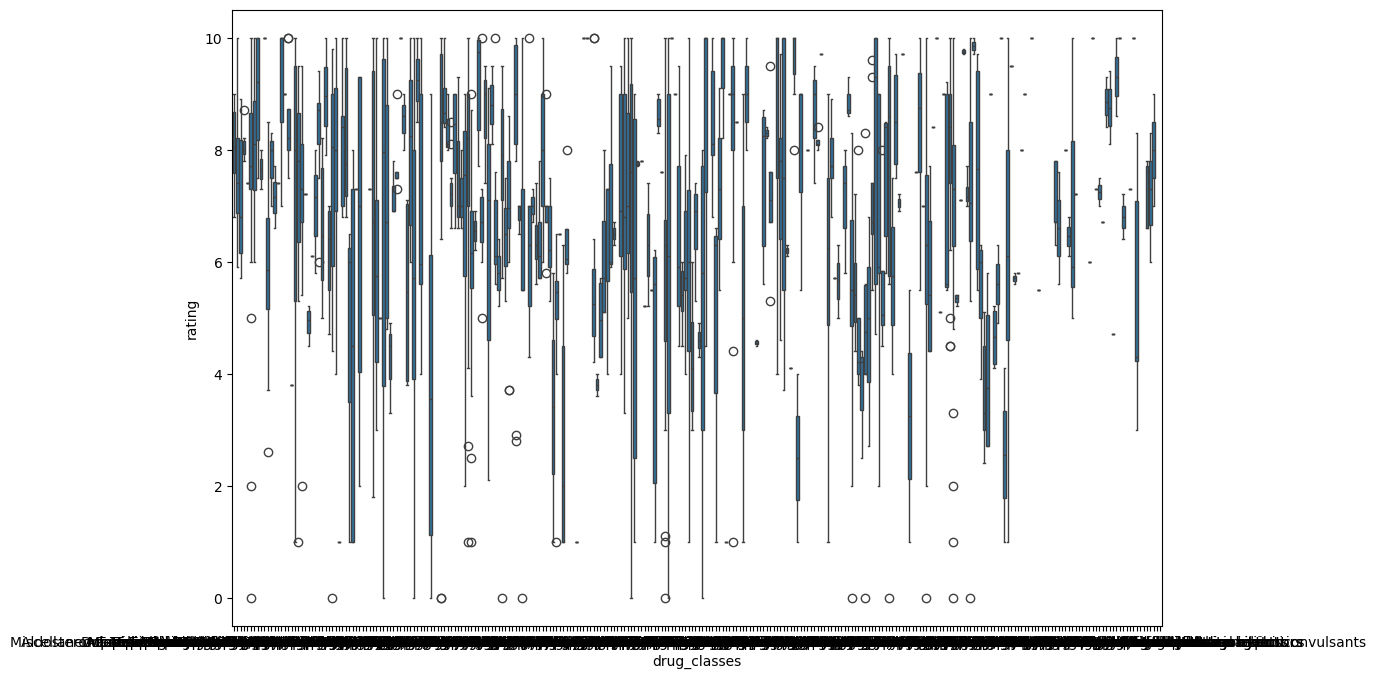

In [73]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='drug_classes', y='rating', data=df)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

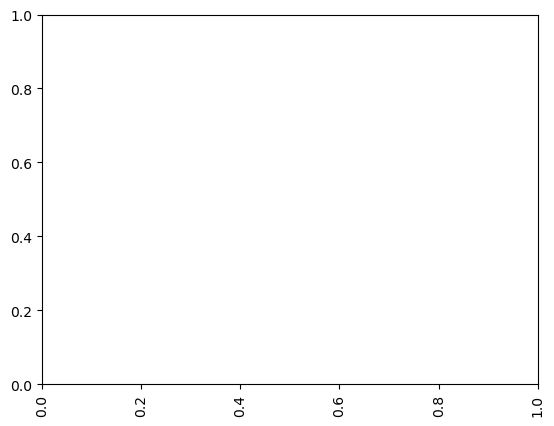

In [75]:
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Drug Ratings by Class')

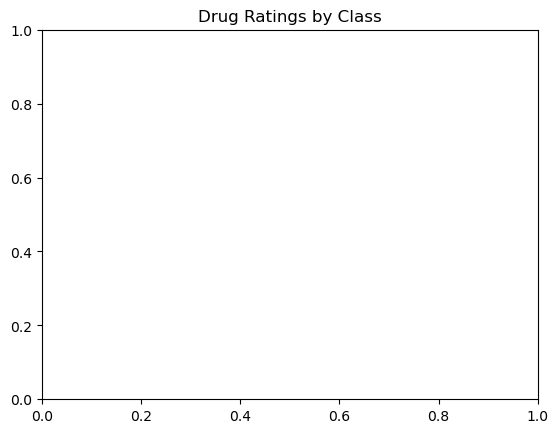

In [77]:
plt.title('Drug Ratings by Class')

In [79]:
plt.show()

## Conclusion

##### Identify any trends or patterns in the data

In [ ]:
High-rated drugs may show fewer severe side effects or may be associated with manageable ones like mild nausea or fatigue.

##### Discuss how certain drug classes or conditions are associated with specific side effects or ratings.

In [ ]:
- Drug classes like antidepressants or statins often have common side effects (e.g., SSRIs with insomnia or gastrointestinal issues).
- Certain conditions, like chronic pain or hypertension, might involve drugs with lower satisfaction ratings due to long-term side effects or dependency concerns.